## Reading, Understanding and Visualising the Dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

In [59]:
df_carprice= pd.read_csv("CarPrice_Assignment.csv")
df_carprice.shape

(205, 26)

In [3]:
df_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Looking at the above info we can conclude that no column and no row have null values

In [4]:
df_carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df_carprice.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [60]:
# Dropping symboling and car_id columns because they have no significance in our analysis
cols_to_drop=['symboling','car_ID']
df_carprice.drop(cols_to_drop,axis='columns',inplace=True)

In [61]:
#Extracting the car company name from carname by using string split function and dropping the CarName columns
df_carprice['car_company_name']= df_carprice['CarName'].apply(lambda x: x.split(' ')[0])# str.split(' ',1)[0]
df_carprice.drop(['CarName'],axis=1,inplace=True)

In [8]:
df_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [9]:
df_carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's visualise the numerical columns listed above

In [9]:
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

<Figure size 432x288 with 0 Axes>

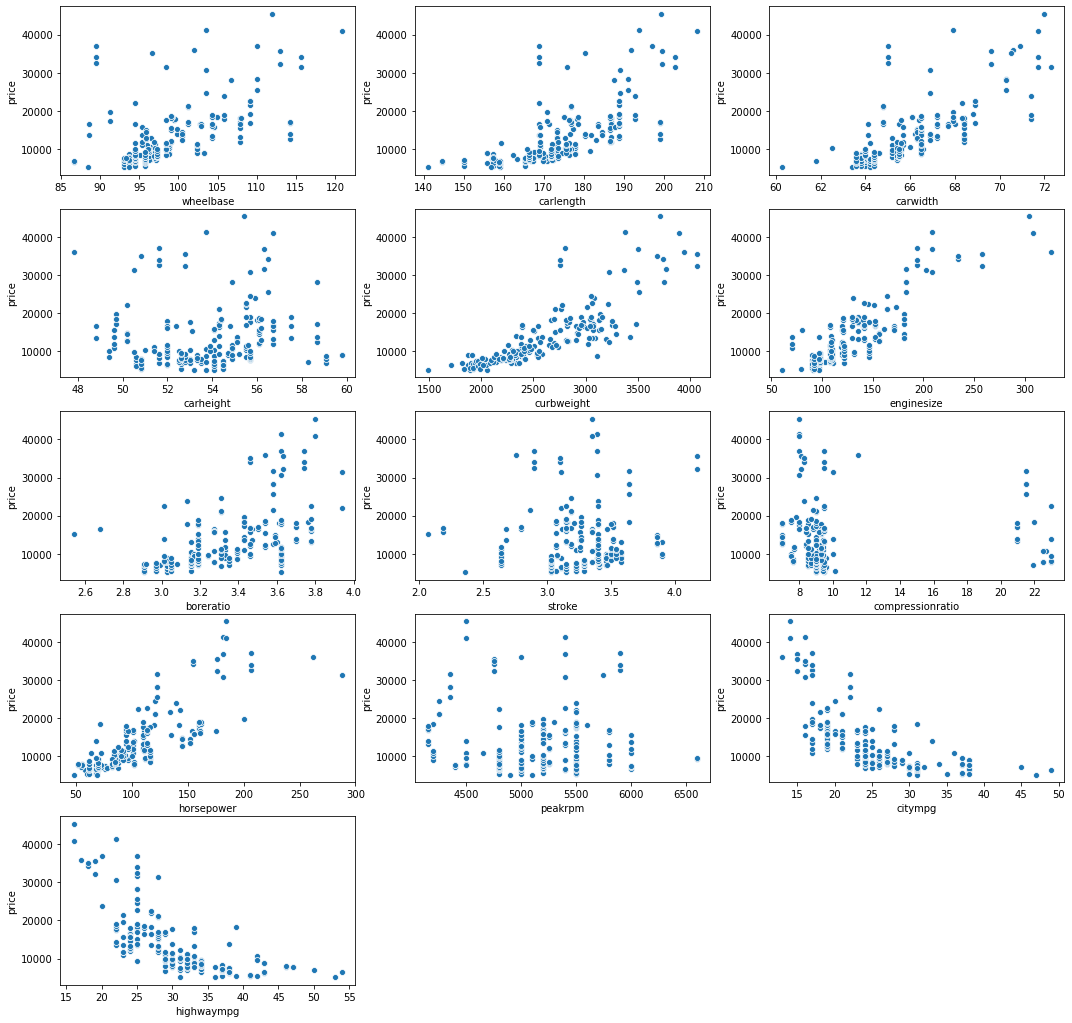

In [10]:
plt.figure(figsize=(18,18))
plt.subplot(5,3,1)
sns.scatterplot(x='wheelbase',y='price',data=df_carprice)
plt.subplot(5,3,2)
sns.scatterplot(x='carlength',y='price',data=df_carprice)
plt.subplot(5,3,3)
sns.scatterplot(x='carwidth',y='price',data=df_carprice)
plt.subplot(5,3,4)
sns.scatterplot(x='carheight',y='price',data=df_carprice)
plt.subplot(5,3,5)
sns.scatterplot(x='curbweight',y='price',data=df_carprice)
plt.subplot(5,3,6)
sns.scatterplot(x='enginesize',y='price',data=df_carprice)
plt.subplot(5,3,7)
sns.scatterplot(x='boreratio',y='price',data=df_carprice)
plt.subplot(5,3,8)
sns.scatterplot(x='stroke',y='price',data=df_carprice)
plt.subplot(5,3,9)
sns.scatterplot(x='compressionratio',y='price',data=df_carprice)
plt.subplot(5,3,10)
sns.scatterplot(x='horsepower',y='price',data=df_carprice)
plt.subplot(5,3,11)
sns.scatterplot(x='peakrpm',y='price',data=df_carprice)
plt.subplot(5,3,12)
sns.scatterplot(x='citympg',y='price',data=df_carprice)
plt.subplot(5,3,13)
sns.scatterplot(x='highwaympg',y='price',data=df_carprice)

If you look at the plots of prices against curbweight, carlength, carwidth , enginesize we can conclude that multiple linear regression model can be applied on this dataset to predict the car prices. 

Let' visualize the categorical variables using boxplots

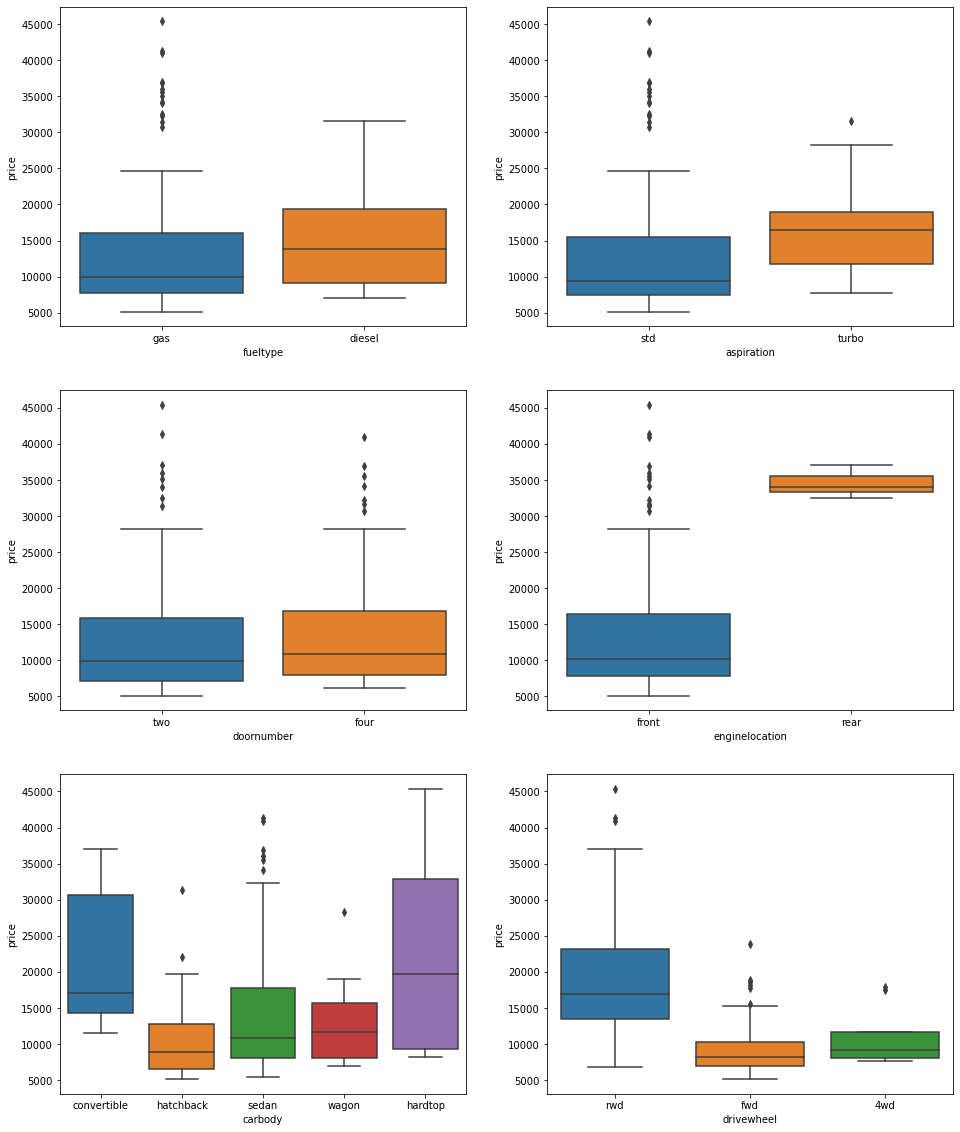

In [13]:
plt.figure(figsize=(16,20))
plt.subplot(3,2,1)
sns.boxplot(x='fueltype',y='price',data=df_carprice)
plt.subplot(3,2,2)
sns.boxplot(x='aspiration',y='price',data=df_carprice)
plt.subplot(3,2,3)
sns.boxplot(x='doornumber',y='price',data=df_carprice)
plt.subplot(3,2,4)
sns.boxplot(x='enginelocation',y='price',data=df_carprice)
plt.subplot(3,2,5)
sns.boxplot(x='carbody',y='price',data=df_carprice)
plt.subplot(3,2,6)
sns.boxplot(x='drivewheel',y='price',data=df_carprice)

- fueltype,aspiration,doornumber - There is not much of variation of the prices for these columns
- enginelocation - There is a lot of variation in the enginelocation. engines at rare have high prices.
- carbody - convertible and hardtop have high prices than other types
- drivewheel - rwd have high prices, fwd and 4wd have low prices

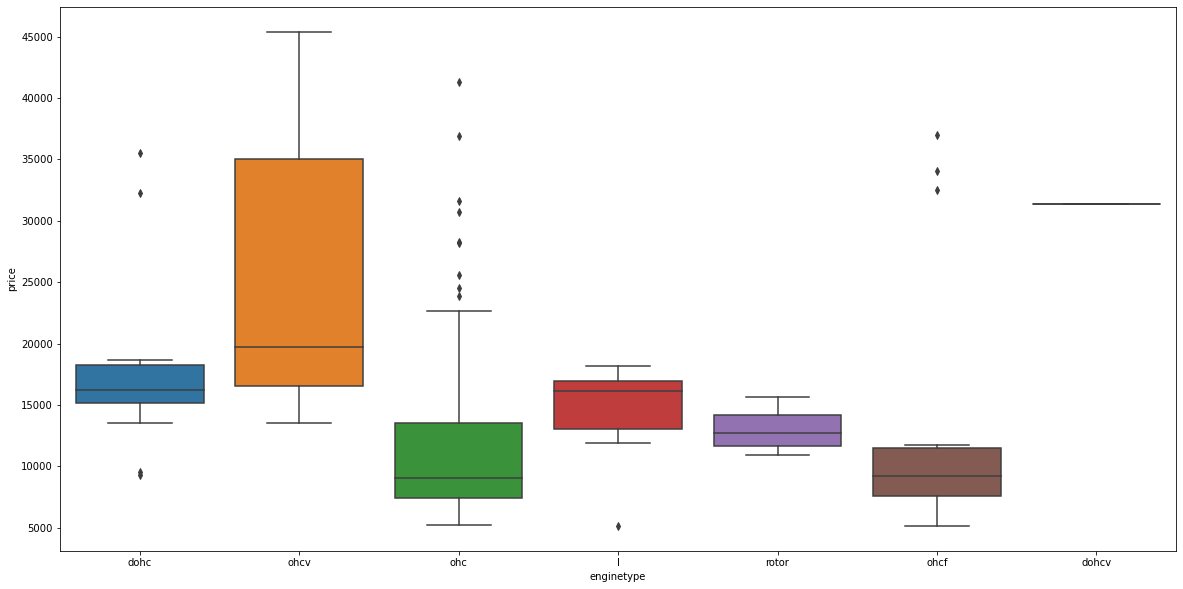

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.boxplot(x='enginetype',y='price',data=df_carprice)

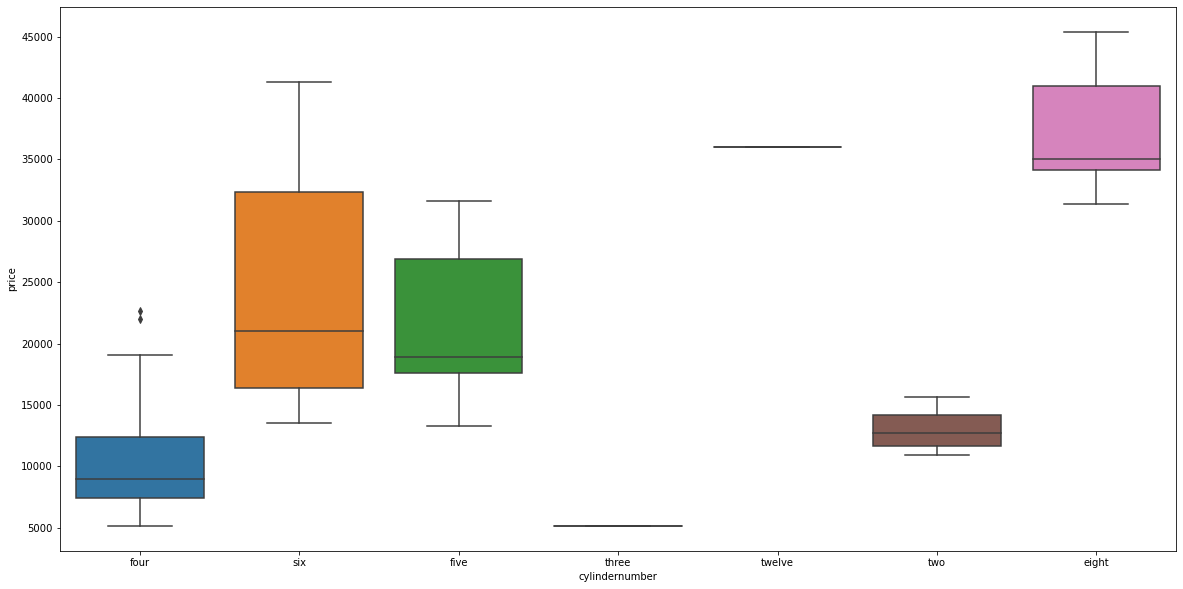

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cylindernumber',y='price',data=df_carprice)

- two and four cylinder cars prices' are low compared to others

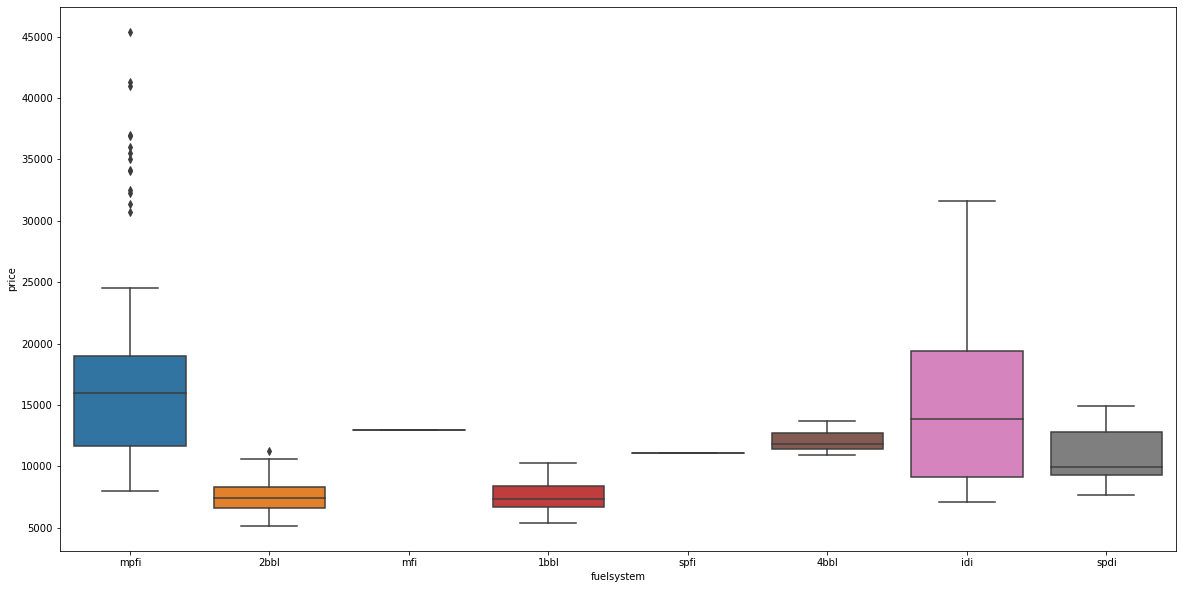

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x='fuelsystem',y='price',data=df_carprice)

- mpfi has a lot of outliers with high pricess.

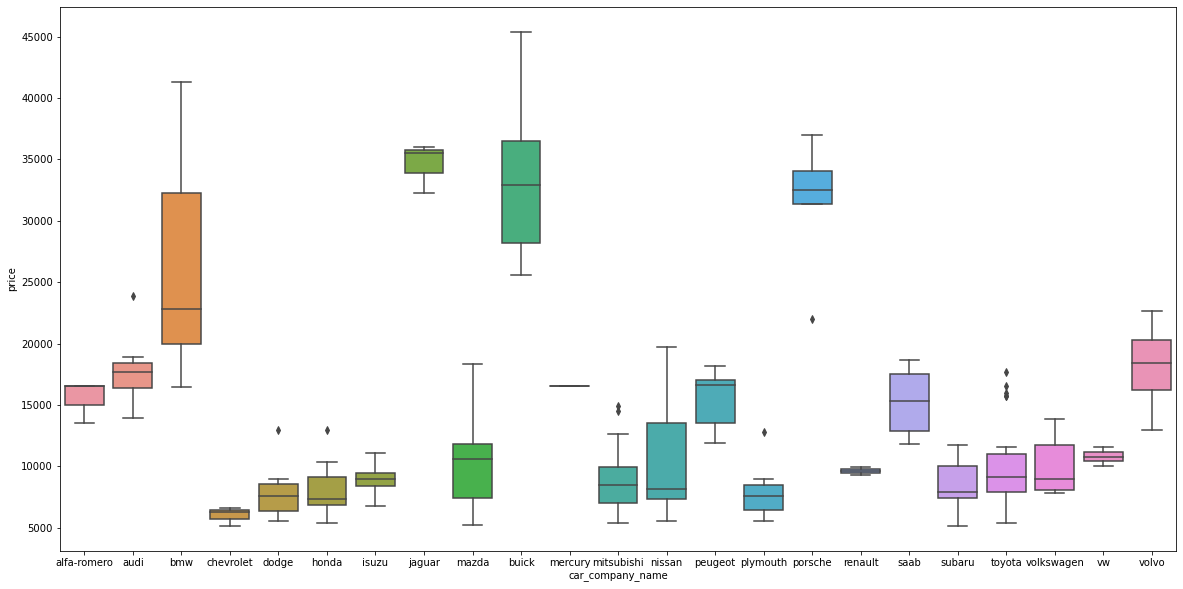

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x='car_company_name',y='price',data=df_carprice)

As seen above the car company names are inconsistent. so, we will manually look at all the names and make them consistent across rows

In [62]:
df_carprice['car_company_name']=df_carprice['car_company_name'].apply(lambda x: 'toyota' if x.lower() =='toyouta' else x)
df_carprice['car_company_name']=df_carprice['car_company_name'].apply(lambda x: 'nissan' if x.lower() =='nissan' else x)
df_carprice['car_company_name']=df_carprice['car_company_name'].apply(lambda x: 'mazda' if x.lower() =='maxda' else x)
df_carprice['car_company_name']=df_carprice['car_company_name'].apply(lambda x: 'volkswagen' if x.lower() =='vokswagen' else x)
df_carprice['car_company_name']=df_carprice['car_company_name'].apply(lambda x: 'porsche' if x.lower() =='porcshce' else x)


In [102]:
df_carprice['car_company_name'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
vw              2
mercury         1
Name: car_company_name, dtype: int64

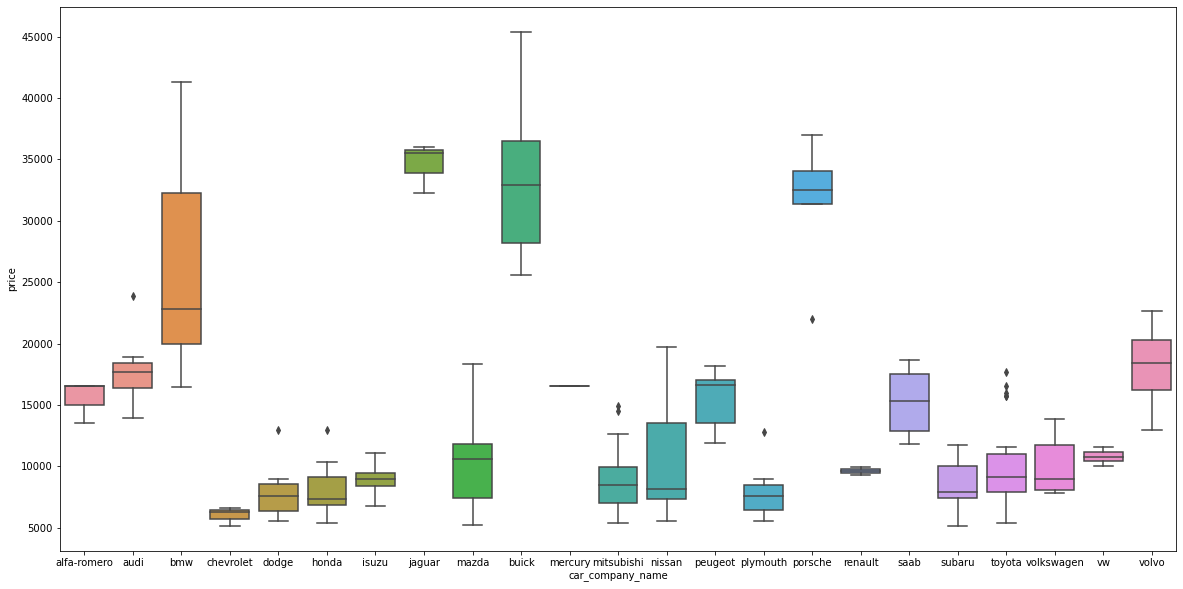

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x='car_company_name',y='price',data=df_carprice)

- buick, bmw porsche and jaguar have high priced cars

## Preparing the data for Modeling - Encoding the categorical data 

- Converting the categorical variables with only two different values to binary type

In [63]:
df_carprice['fueltype']= df_carprice['fueltype'].apply(lambda x: 0 if x=='gas' else 1)

df_carprice['aspiration']= df_carprice['aspiration'].apply(lambda x: 0 if x=='std' else 1)

df_carprice['doornumber']= df_carprice['doornumber'].apply(lambda x: 0 if x=='two' else 1)

df_carprice['enginelocation']= df_carprice['enginelocation'].apply(lambda x: 0 if x=='front' else 1)

- cylindernumber values to be converted to their numeric equivalents

In [64]:
df_carprice['cylindernumber']=df_carprice['cylindernumber'].replace(to_replace=['four','six','five','eight','two','twelve','three'],value=[4,6,5,8,2,12,3])

- using one-hot encoding for carbody because it has five different values
  - 0000 - convertible
  - 1000 - hardtop
  - 0100 - hatchback
  - 0010 - sedan
  - 0001 - wagon

In [65]:
code_carbody=pd.get_dummies(df_carprice['carbody'],drop_first=True)
code_carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


Merging the code_carbody and df_carprice dataframes

In [66]:
df_carprice= pd.concat([df_carprice,code_carbody],axis=1)

In [22]:
df_carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,car_company_name,hardtop,hatchback,sedan,wagon
0,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.0,audi,0,0,1,0


- Encoding drivewheel column
    - 00 - 4wd
    - 10 - fwd
    - 01 - rwd

In [67]:
code_drivewheel=pd.get_dummies(df_carprice['drivewheel'],drop_first=True)
code_drivewheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


Merging code_drivewheel and df_carprice dataframes

In [68]:
df_carprice=pd.concat([df_carprice,code_drivewheel],axis=1)

In [27]:
df_carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,citympg,highwaympg,price,car_company_name,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,21,27,13495.0,alfa-romero,0,0,0,0,0,1
1,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,21,27,16500.0,alfa-romero,0,0,0,0,0,1
2,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,...,24,30,13950.0,audi,0,0,1,0,1,0
4,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,...,18,22,17450.0,audi,0,0,1,0,0,0


In [28]:
print(df_carprice['enginetype'].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In the engine type, we have ['dohc','ohcv','ohc','ohcf','dohcv'] are of  Overhead Camshaft Egine and can be categorized as 1 and the other types ['l','rotor'] as 0
- 0 - ['l','rotor']
- 1 - ['dohc','ohcv','ohc','ohcf','dohcv']

In [69]:
df_carprice['enginetype']=df_carprice['enginetype'].apply(lambda x : 1 if ('ohc' in x) else 0)

In [70]:
obj_df_carprice = df_carprice[['fuelsystem','car_company_name']].copy()

In [32]:
obj_df_carprice.head()

,fuelsystem,car_company_name
0,mpfi,alfa-romero
1,mpfi,alfa-romero
2,mpfi,alfa-romero
3,mpfi,audi
4,mpfi,audi


In [38]:
print('Number of unique values of fuelsystem = '+ str(len(df_carprice['fuelsystem'].unique())))
print('Nubmer of unique values of car_company_name = ' + str(len(df_carprice['car_company_name'].unique())))

Number of unique values of fuelsystem = 8
Nubmer of unique values of car_company_name = 28


Since there are 8 and 28 unique values in fuelsystemand car_company_name we will use binary encoding as below

In [71]:
obj_df_carprice = df_carprice[['fuelsystem','car_company_name']].copy()
code_fs_ccn = df_carprice[['fuelsystem','car_company_name']].copy()

encoder = ce.binary.BinaryEncoder()
encoder.fit(code_fs_ccn, verbose=1)

code_fs_ccn=encoder.transform(code_fs_ccn)

df_carprice=pd.concat([df_carprice,code_fs_ccn],axis=1)

In [33]:
df_carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,car_company_name_0,car_company_name_1,car_company_name_2,car_company_name_3,car_company_name_4,car_company_name_5
0,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,...,0,0,0,1,0,0,0,0,1,0
4,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,...,0,0,0,1,0,0,0,0,1,0


In [39]:
df_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fueltype            205 non-null    int64  
 1   aspiration          205 non-null    int64  
 2   doornumber          205 non-null    int64  
 3   carbody             205 non-null    object 
 4   drivewheel          205 non-null    object 
 5   enginelocation      205 non-null    int64  
 6   wheelbase           205 non-null    float64
 7   carlength           205 non-null    float64
 8   carwidth            205 non-null    float64
 9   carheight           205 non-null    float64
 10  curbweight          205 non-null    int64  
 11  enginetype          205 non-null    int64  
 12  cylindernumber      205 non-null    int64  
 13  enginesize          205 non-null    int64  
 14  fuelsystem          205 non-null    object 
 15  boreratio           205 non-null    float64
 16  stroke  

Looking at the information of df_carprice there are 4 object columns that will be removed

In [72]:
object_cols=['car_company_name','fuelsystem','carbody','drivewheel']
df_carprice.drop(object_cols,axis=1,inplace=True)

In [41]:
df_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fueltype            205 non-null    int64  
 1   aspiration          205 non-null    int64  
 2   doornumber          205 non-null    int64  
 3   enginelocation      205 non-null    int64  
 4   wheelbase           205 non-null    float64
 5   carlength           205 non-null    float64
 6   carwidth            205 non-null    float64
 7   carheight           205 non-null    float64
 8   curbweight          205 non-null    int64  
 9   enginetype          205 non-null    int64  
 10  cylindernumber      205 non-null    int64  
 11  enginesize          205 non-null    int64  
 12  boreratio           205 non-null    float64
 13  stroke              205 non-null    float64
 14  compressionratio    205 non-null    float64
 15  horsepower          205 non-null    int64  
 16  peakrpm 

## Train - Test Split

In [73]:
car_train,car_test= train_test_split(df_carprice,train_size=0.7,random_state=100)

In [43]:
print(car_train.shape)
print(car_test.shape)

(143, 36)
(62, 36)


### Rescaling the columns - Normalization

In [44]:
car_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3',
       'car_company_name_0', 'car_company_name_1', 'car_company_name_2',
       'car_company_name_3', 'car_company_name_4', 'car_company_name_5'],
      dtype='object')

In [203]:
car_train['horsepower'].unique()

array([ 68, 143, 112, 111, 162,  90,  69,  92, 156, 142, 101,  70,  62,
        88, 207, 114, 116, 145, 121, 182, 161,  55,  95,  82,  86, 110,
       176, 160, 102,  76,  84, 100, 152,  85, 155,  78,  73, 123,  58,
        48,  97,  64,  94, 200, 154, 262, 134, 115, 288,  56, 135, 106,
        72, 140], dtype=int64)

In [74]:
master_car_train=car_train.copy()

In [75]:
scaler = MinMaxScaler() # Create an object of Min Max to Normalize the data

In [76]:
cols=['price','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
car_train[cols]=scaler.fit_transform(car_train[cols])

In [49]:
car_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,car_company_name_0,car_company_name_1,car_company_name_2,car_company_name_3,car_company_name_4,car_company_name_5
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,1,...,0,0,1,0,0,1,0,0,0,1
125,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,1,...,0,0,0,1,0,1,0,0,1,0
166,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,1,...,0,0,0,1,0,1,0,1,1,1
1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,1,...,0,0,0,1,0,0,0,0,0,1
199,1,1,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,1,...,0,0,0,1,0,1,1,1,0,0


### Dividing X and y variables

In [77]:
ytrain= car_train.pop('price')
Xtrain=car_train

### Building the model using RFE

In [78]:
#using RFE to find out 20 top variables selected
lm=LinearRegression()

lm.fit(Xtrain,ytrain)

rfe=RFE(lm,20)
rfe=rfe.fit(Xtrain,ytrain)

top20_cols= Xtrain.columns[rfe.support_]
top20_cols

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'rwd', 'fuelsystem_0', 'car_company_name_3'],
      dtype='object')

In [52]:
list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 6),
 ('aspiration', False, 14),
 ('doornumber', False, 15),
 ('enginelocation', False, 13),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', False, 9),
 ('enginetype', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 11),
 ('highwaympg', True, 1),
 ('hardtop', False, 12),
 ('hatchback', True, 1),
 ('sedan', False, 3),
 ('wagon', False, 2),
 ('fwd', False, 8),
 ('rwd', True, 1),
 ('fuelsystem_0', True, 1),
 ('fuelsystem_1', True, 1),
 ('fuelsystem_2', True, 1),
 ('fuelsystem_3', True, 1),
 ('car_company_name_0', False, 16),
 ('car_company_name_1', False, 4),
 ('car_company_name_2', False, 5),
 ('car_company_name_3', True, 1),
 ('car_company_name_4', False, 7),
 ('car_company_name_5', False, 10)]

In [146]:
Xtrain.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'compressionratio',
       'citympg', 'fwd', 'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3',
       'car_company_name_0', 'car_company_name_1', 'car_company_name_2',
       'car_company_name_4', 'car_company_name_5'],
      dtype='object')

### Building Model using Stats model

In [79]:
Xrfe_train = Xtrain[top20_cols] # Create train df to filter only RFE columns

#Add Constant
Xrfe_train = sm.add_constant(Xrfe_train)

#Running the linear model
lm= sm.OLS(ytrain,Xrfe_train).fit() 

In [82]:
#Summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     64.03
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.87e-55
Time:                        17:41:48   Log-Likelihood:                 191.56
No. Observations:                 143   AIC:                            -341.1
Df Residuals:                     122   BIC:                            -278.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0059      0.089     -0.066      0.947      -0.183       0.171
enginelocation         0.3365      0.091      3.715      0.000       0.157       0.516
wheelbase              0.2606      0.087      3.006      0.003       0.089       0.432
carlength             -0.2287      0.094     -2.426      0.017      -0.415      -0.042
carwidth               0.2161      0.095      2.286      0.024       0.029       0.403
curbweight             0.3438      0.132      2.602      0.010       0.082       0.605
enginetype             0.0605      0.028      2.190      0.030       0.006       0.115
cylindernumber        -0.4353      0.237     -1.838      0.069      -0.904       0.034
enginesize             0.6681      0.238      2.801      0.006       0.196       1.140
boreratio             -0.2230      0.075     -2.976      0.004      -0.371      -0.075
stroke                -0.1014      0.074     -1.362      0.176      -0.249       0.046
horsepower             0.3244      0.113      2.861      0.005       0.100       0.549
peakrpm                0.0875      0.045      1.937      0.055      -0.002       0.177
highwaympg             0.1675      0.067      2.493      0.014       0.034       0.300
hardtop               -0.0915      0.066     -1.396      0.165      -0.221       0.038
hatchback             -0.1110      0.044     -2.532      0.013      -0.198      -0.024
sedan                 -0.0740      0.045     -1.627      0.106      -0.164       0.016
wagon                 -0.0965      0.048     -1.991      0.049      -0.193      -0.001
rwd                    0.0720      0.021      3.431      0.001       0.030       0.113
fuelsystem_0           0.0114      0.033      0.343      0.732      -0.054       0.077
car_company_name_3    -0.0956      0.016     -6.032      0.000      -0.127      -0.064
==============================================================================
Omnibus:                       68.466   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.274
Skew:                           1.544   Prob(JB):                     4.10e-96
Kurtosis:                      11.012   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P- value for fuelsystem_0 is 0.732 which is very high and we build the model again after removing that variable

Let's calculate the VIF for the new model

In [83]:
X = Xrfe_train.drop(['const'],axis=1)

vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
7,enginesize,97.15
4,curbweight,90.45
2,carlength,82.53
6,cylindernumber,79.61
3,carwidth,63.96
1,wheelbase,47.49
9,stroke,39.15
8,boreratio,30.38
15,sedan,29.17
10,horsepower,28.03


We will use this strategy to drop the columns
- high p, high VIF - drop these
    - high p, low VIF - drop these and check if the VIF changes for other high VIF variables
    - low p, high VIF - drop these after the ones above
- low p, low VIF - Never drop these

- high VIf(>5[enginesize,curbweight,carlength,cylindernumber,carwidth,wheelbase,stroke,boreratio,sedan,
horsepower,enginetype,highwaympg,hatchback,wagon,peakrpm]

- high P value(>0.05) - [carlength,carwidth,enginetype,cylindernumber,stroke,peakrpm,hardtop,sedan,fuelsystem_0]
- [fuelsystem_0, stroke,hardtop,sedan,cylindernumber,peakrpm,]

We will remove Cylinder number from Xtrain and rebuild the model to verify the VIF and P values

In [85]:
Xrfe_train_1= Xrfe_train.drop(['cylindernumber'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_1)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     65.95
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.68e-55
Time:                        18:04:53   Log-Likelihood:                 189.60
No. Observations:                 143   AIC:                            -339.2
Df Residuals:                     123   BIC:                            -279.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1022      0.073     -1.398      0.165      -0.247       0.043
enginelocation         0.3578      0.091      3.945      0.000       0.178       0.537
wheelbase              0.2683      0.087      3.070      0.003       0.095       0.441
carlength             -0.2164      0.095     -2.279      0.024      -0.404      -0.028
carwidth               0.1531      0.089      1.721      0.088      -0.023       0.329
curbweight             0.4153      0.127      3.258      0.001       0.163       0.668
enginetype             0.0498      0.027      1.825      0.070      -0.004       0.104
enginesize             0.2873      0.119      2.408      0.018       0.051       0.523
boreratio             -0.1107      0.044     -2.527      0.013      -0.197      -0.024
stroke                 0.0050      0.047      0.106      0.916      -0.089       0.099
horsepower             0.2576      0.108      2.375      0.019       0.043       0.472
peakrpm                0.1031      0.045      2.302      0.023       0.014       0.192
highwaympg             0.1612      0.068      2.379      0.019       0.027       0.295
hardtop               -0.1067      0.066     -1.625      0.107      -0.237       0.023
hatchback             -0.1233      0.044     -2.820      0.006      -0.210      -0.037
sedan                 -0.0909      0.045     -2.022      0.045      -0.180      -0.002
wagon                 -0.1195      0.047     -2.526      0.013      -0.213      -0.026
rwd                    0.0748      0.021      3.544      0.001       0.033       0.117
fuelsystem_0           0.0167      0.033      0.501      0.617      -0.049       0.083
car_company_name_3    -0.1018      0.016     -6.509      0.000      -0.133      -0.071
==============================================================================
Omnibus:                       74.540   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.021
Skew:                           1.674   Prob(JB):                    2.44e-117
Kurtosis:                      11.884   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X= Xrfe_train_1.drop(['const'],axis=1)

vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
4,curbweight,90.19
2,carlength,82.29
3,carwidth,58.19
1,wheelbase,46.49
6,enginesize,34.20
9,horsepower,27.04
14,sedan,25.31
8,stroke,20.54
11,highwaympg,16.65
5,enginetype,16.48


We will remove carwidth feature since it has high P value and high VIF value

In [87]:
Xrfe_train_2= Xrfe_train_1.drop(['carwidth'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_2)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     68.36
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.85e-55
Time:                        18:04:59   Log-Likelihood:                 187.90
No. Observations:                 143   AIC:                            -337.8
Df Residuals:                     124   BIC:                            -281.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1023      0.074     -1.388      0.168      -0.248       0.044
enginelocation         0.3464      0.091      3.800      0.000       0.166       0.527
wheelbase              0.3296      0.080      4.095      0.000       0.170       0.489
carlength             -0.1866      0.094     -1.983      0.050      -0.373      -0.000
curbweight             0.4701      0.124      3.779      0.000       0.224       0.716
enginetype             0.0485      0.027      1.765      0.080      -0.006       0.103
enginesize             0.2701      0.120      2.254      0.026       0.033       0.507
boreratio             -0.1028      0.044     -2.342      0.021      -0.190      -0.016
stroke                 0.0139      0.047      0.293      0.770      -0.080       0.108
horsepower             0.3125      0.104      2.992      0.003       0.106       0.519
peakrpm                0.1159      0.044      2.605      0.010       0.028       0.204
highwaympg             0.1881      0.066      2.832      0.005       0.057       0.320
hardtop               -0.1219      0.066     -1.857      0.066      -0.252       0.008
hatchback             -0.1337      0.044     -3.063      0.003      -0.220      -0.047
sedan                 -0.1070      0.044     -2.414      0.017      -0.195      -0.019
wagon                 -0.1422      0.046     -3.104      0.002      -0.233      -0.052
rwd                    0.0636      0.020      3.142      0.002       0.024       0.104
fuelsystem_0           0.0104      0.033      0.310      0.757      -0.056       0.077
car_company_name_3    -0.1093      0.015     -7.230      0.000      -0.139      -0.079
==============================================================================
Omnibus:                       61.419   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.847
Skew:                           1.407   Prob(JB):                     1.18e-73
Kurtosis:                       9.960   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
X= Xrfe_train_2.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,curbweight,83.84
2,carlength,79.45
1,wheelbase,38.54
5,enginesize,33.95
8,horsepower,24.65
13,sedan,24.07
7,stroke,20.30
4,enginetype,16.46
12,hatchback,15.88
10,highwaympg,15.37


We will remove stroke since it has high p value and high VIF

In [89]:
Xrfe_train_3= Xrfe_train_2.drop(['stroke'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_3)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     72.91
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.22e-56
Time:                        18:05:04   Log-Likelihood:                 187.85
No. Observations:                 143   AIC:                            -339.7
Df Residuals:                     125   BIC:                            -286.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1003      0.073     -1.371      0.173      -0.245       0.044
enginelocation         0.3444      0.091      3.802      0.000       0.165       0.524
wheelbase              0.3278      0.080      4.099      0.000       0.170       0.486
carlength             -0.1828      0.093     -1.968      0.051      -0.367       0.001
curbweight             0.4768      0.122      3.913      0.000       0.236       0.718
enginetype             0.0482      0.027      1.761      0.081      -0.006       0.102
enginesize             0.2761      0.118      2.346      0.021       0.043       0.509
boreratio             -0.1066      0.042     -2.545      0.012      -0.189      -0.024
horsepower             0.3066      0.102      3.002      0.003       0.104       0.509
peakrpm                0.1178      0.044      2.685      0.008       0.031       0.205
highwaympg             0.1902      0.066      2.892      0.005       0.060       0.320
hardtop               -0.1185      0.064     -1.841      0.068      -0.246       0.009
hatchback             -0.1313      0.043     -3.073      0.003      -0.216      -0.047
sedan                 -0.1054      0.044     -2.405      0.018      -0.192      -0.019
wagon                 -0.1418      0.046     -3.109      0.002      -0.232      -0.052
rwd                    0.0629      0.020      3.140      0.002       0.023       0.103
fuelsystem_0           0.0124      0.033      0.382      0.703      -0.052       0.077
car_company_name_3    -0.1087      0.015     -7.286      0.000      -0.138      -0.079
==============================================================================
Omnibus:                       61.340   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.390
Skew:                           1.405   Prob(JB):                     1.48e-73
Kurtosis:                       9.957   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X= Xrfe_train_3.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,curbweight,79.33
2,carlength,77.44
1,wheelbase,38.17
5,enginesize,33.09
7,horsepower,23.57
12,sedan,23.38
4,enginetype,16.46
11,hatchback,14.92
9,highwaympg,14.76
6,boreratio,13.73


We will drop enginetype and rebuild the model

In [91]:
Xrfe_train_4= Xrfe_train_3.drop(['carlength'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_4)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     75.51
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.65e-56
Time:                        18:05:10   Log-Likelihood:                 185.67
No. Observations:                 143   AIC:                            -337.3
Df Residuals:                     126   BIC:                            -287.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1303      0.072     -1.801      0.074      -0.273       0.013
enginelocation         0.3448      0.092      3.764      0.000       0.164       0.526
wheelbase              0.2492      0.070      3.557      0.001       0.111       0.388
curbweight             0.3991      0.117      3.423      0.001       0.168       0.630
enginetype             0.0413      0.027      1.504      0.135      -0.013       0.096
enginesize             0.3003      0.118      2.537      0.012       0.066       0.534
boreratio             -0.1248      0.041     -3.021      0.003      -0.206      -0.043
horsepower             0.3055      0.103      2.957      0.004       0.101       0.510
peakrpm                0.1178      0.044      2.657      0.009       0.030       0.206
highwaympg             0.2168      0.065      3.329      0.001       0.088       0.346
hardtop               -0.1232      0.065     -1.894      0.060      -0.252       0.006
hatchback             -0.1291      0.043     -2.988      0.003      -0.215      -0.044
sedan                 -0.1149      0.044     -2.609      0.010      -0.202      -0.028
wagon                 -0.1505      0.046     -3.279      0.001      -0.241      -0.060
rwd                    0.0658      0.020      3.256      0.001       0.026       0.106
fuelsystem_0           0.0154      0.033      0.467      0.641      -0.050       0.080
car_company_name_3    -0.1060      0.015     -7.054      0.000      -0.136      -0.076
==============================================================================
Omnibus:                       47.942   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.140
Skew:                           1.101   Prob(JB):                     7.06e-48
Kurtosis:                       8.621   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
X= Xrfe_train_4.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,curbweight,63.67
4,enginesize,32.51
1,wheelbase,29.49
6,horsepower,23.54
11,sedan,22.40
3,enginetype,15.47
10,hatchback,14.84
8,highwaympg,14.60
5,boreratio,12.47
7,peakrpm,8.30


We will drop enginesize and repeat the stesps

In [93]:
Xrfe_train_5= Xrfe_train_4.drop(['enginetype'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_5)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     79.60
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.50e-57
Time:                        18:05:13   Log-Likelihood:                 184.40
No. Observations:                 143   AIC:                            -336.8
Df Residuals:                     127   BIC:                            -289.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0795      0.064     -1.237      0.218      -0.207       0.048
enginelocation         0.3314      0.092      3.617      0.000       0.150       0.513
wheelbase              0.2379      0.070      3.399      0.001       0.099       0.376
curbweight             0.3606      0.114      3.154      0.002       0.134       0.587
enginesize             0.3750      0.108      3.474      0.001       0.161       0.589
boreratio             -0.1316      0.041     -3.190      0.002      -0.213      -0.050
horsepower             0.3082      0.104      2.969      0.004       0.103       0.514
peakrpm                0.1160      0.045      2.604      0.010       0.028       0.204
highwaympg             0.2087      0.065      3.200      0.002       0.080       0.338
hardtop               -0.1193      0.065     -1.826      0.070      -0.249       0.010
hatchback             -0.1312      0.043     -3.024      0.003      -0.217      -0.045
sedan                 -0.1142      0.044     -2.580      0.011      -0.202      -0.027
wagon                 -0.1485      0.046     -3.220      0.002      -0.240      -0.057
rwd                    0.0553      0.019      2.902      0.004       0.018       0.093
fuelsystem_0           0.0151      0.033      0.456      0.649      -0.050       0.081
car_company_name_3    -0.1070      0.015     -7.093      0.000      -0.137      -0.077
==============================================================================
Omnibus:                       45.974   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.156
Skew:                           1.068   Prob(JB):                     1.54e-43
Kurtosis:                       8.341   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X= Xrfe_train_5.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,curbweight,63.67
1,wheelbase,28.48
3,enginesize,27.19
5,horsepower,23.41
10,sedan,21.07
9,hatchback,14.12
7,highwaympg,13.68
4,boreratio,12.41
6,peakrpm,7.65
11,wagon,6.58


We will drop fuelsystem_0 and check if the VIF value changes

In [94]:
Xrfe_train_6= Xrfe_train_5.drop(['fuelsystem_0'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_6)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     85.80
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.45e-58
Time:                        18:05:16   Log-Likelihood:                 184.28
No. Observations:                 143   AIC:                            -338.6
Df Residuals:                     128   BIC:                            -294.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0774      0.064     -1.211      0.228      -0.204       0.049
enginelocation         0.3315      0.091      3.630      0.000       0.151       0.512
wheelbase              0.2347      0.069      3.381      0.001       0.097       0.372
curbweight             0.3634      0.114      3.194      0.002       0.138       0.589
enginesize             0.3703      0.107      3.457      0.001       0.158       0.582
boreratio             -0.1306      0.041     -3.179      0.002      -0.212      -0.049
horsepower             0.3127      0.103      3.036      0.003       0.109       0.517
peakrpm                0.1136      0.044      2.576      0.011       0.026       0.201
highwaympg             0.2033      0.064      3.180      0.002       0.077       0.330
hardtop               -0.1192      0.065     -1.830      0.070      -0.248       0.010
hatchback             -0.1297      0.043     -3.007      0.003      -0.215      -0.044
sedan                 -0.1135      0.044     -2.574      0.011      -0.201      -0.026
wagon                 -0.1489      0.046     -3.238      0.002      -0.240      -0.058
rwd                    0.0532      0.018      2.888      0.005       0.017       0.090
car_company_name_3    -0.1051      0.014     -7.267      0.000      -0.134      -0.076
==============================================================================
Omnibus:                       45.777   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.631
Skew:                           1.060   Prob(JB):                     1.22e-43
Kurtosis:                       8.355   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X= Xrfe_train_6.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,curbweight,63.08
1,wheelbase,28.08
3,enginesize,26.96
5,horsepower,23.25
10,sedan,20.95
9,hatchback,13.88
7,highwaympg,13.27
4,boreratio,12.32
6,peakrpm,7.59
11,wagon,6.58


We will drop curbweight and check if the VIF value changes

In [96]:
Xrfe_train_7= Xrfe_train_6.drop(['curbweight'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_7)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     85.52
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.78e-57
Time:                        18:05:26   Log-Likelihood:                 178.80
No. Observations:                 143   AIC:                            -329.6
Df Residuals:                     129   BIC:                            -288.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0131      0.059      0.220      0.826      -0.104       0.130
enginelocation         0.3246      0.094      3.435      0.001       0.138       0.512
wheelbase              0.3709      0.057      6.544      0.000       0.259       0.483
enginesize             0.5100      0.101      5.038      0.000       0.310       0.710
boreratio             -0.1239      0.042     -2.920      0.004      -0.208      -0.040
horsepower             0.4165      0.101      4.117      0.000       0.216       0.617
peakrpm                0.0798      0.044      1.800      0.074      -0.008       0.168
highwaympg             0.1352      0.062      2.167      0.032       0.012       0.259
hardtop               -0.1563      0.066     -2.356      0.020      -0.287      -0.025
hatchback             -0.1566      0.044     -3.578      0.000      -0.243      -0.070
sedan                 -0.1418      0.045     -3.173      0.002      -0.230      -0.053
wagon                 -0.1563      0.048     -3.289      0.001      -0.250      -0.062
rwd                    0.0664      0.019      3.574      0.000       0.030       0.103
car_company_name_3    -0.1048      0.015     -7.003      0.000      -0.134      -0.075
==============================================================================
Omnibus:                       39.030   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.387
Skew:                           0.953   Prob(JB):                     2.42e-30
Kurtosis:                       7.388   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
X= Xrfe_train_7.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
4,horsepower,21.62
9,sedan,20.95
2,enginesize,20.55
1,wheelbase,18.02
8,hatchback,13.87
6,highwaympg,13.15
3,boreratio,11.56
5,peakrpm,7.58
10,wagon,6.38
12,car_company_name_3,3.75


We will drop peakrpm and check if the VIF value changes

In [98]:
Xrfe_train_8= Xrfe_train_7.drop(['peakrpm'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_8)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     90.81
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.39e-57
Time:                        18:05:29   Log-Likelihood:                 177.02
No. Observations:                 143   AIC:                            -328.0
Df Residuals:                     130   BIC:                            -289.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0691      0.051      1.357      0.177      -0.032       0.170
enginelocation         0.3424      0.095      3.612      0.000       0.155       0.530
wheelbase              0.3593      0.057      6.327      0.000       0.247       0.472
enginesize             0.4220      0.089      4.720      0.000       0.245       0.599
boreratio             -0.1447      0.041     -3.512      0.001      -0.226      -0.063
horsepower             0.4956      0.092      5.391      0.000       0.314       0.677
highwaympg             0.1108      0.061      1.804      0.074      -0.011       0.232
hardtop               -0.1564      0.067     -2.338      0.021      -0.289      -0.024
hatchback             -0.1561      0.044     -3.537      0.001      -0.243      -0.069
sedan                 -0.1395      0.045     -3.095      0.002      -0.229      -0.050
wagon                 -0.1584      0.048     -3.306      0.001      -0.253      -0.064
rwd                    0.0654      0.019      3.490      0.001       0.028       0.102
car_company_name_3    -0.1006      0.015     -6.746      0.000      -0.130      -0.071
==============================================================================
Omnibus:                       43.427   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.610
Skew:                           1.008   Prob(JB):                     6.04e-40
Kurtosis:                       8.123   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
X= Xrfe_train_8.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
8,sedan,18.73
1,wheelbase,17.93
2,enginesize,17.24
4,horsepower,16.69
5,highwaympg,13.06
7,hatchback,12.37
3,boreratio,11.51
9,wagon,5.87
11,car_company_name_3,3.61
10,rwd,3.23


We will drop highwaympg and check if the VIF value changes

In [100]:
Xrfe_train_9= Xrfe_train_8.drop(['highwaympg'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_9)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     97.10
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.13e-57
Time:                        18:05:34   Log-Likelihood:                 175.26
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     131   BIC:                            -291.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1154      0.044      2.604      0.010       0.028       0.203
enginelocation         0.3489      0.096      3.652      0.000       0.160       0.538
wheelbase              0.3163      0.052      6.085      0.000       0.213       0.419
enginesize             0.4630      0.087      5.310      0.000       0.291       0.635
boreratio             -0.1460      0.042     -3.514      0.001      -0.228      -0.064
horsepower             0.3972      0.075      5.322      0.000       0.250       0.545
hardtop               -0.1351      0.066     -2.035      0.044      -0.267      -0.004
hatchback             -0.1334      0.043     -3.126      0.002      -0.218      -0.049
sedan                 -0.1157      0.043     -2.662      0.009      -0.202      -0.030
wagon                 -0.1404      0.047     -2.972      0.004      -0.234      -0.047
rwd                    0.0652      0.019      3.451      0.001       0.028       0.103
car_company_name_3    -0.0940      0.015     -6.447      0.000      -0.123      -0.065
==============================================================================
Omnibus:                       43.453   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.533
Skew:                           1.025   Prob(JB):                     2.08e-38
Kurtosis:                       7.992   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X= Xrfe_train_9.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,enginesize,15.35
1,wheelbase,14.15
4,horsepower,11.28
3,boreratio,11.10
7,sedan,8.30
6,hatchback,4.91
8,wagon,3.48
9,rwd,3.23
10,car_company_name_3,3.16
5,hardtop,1.86


In [ ]:
all the pvalues are low. Now we will focus on VIF values

In [102]:
Xrfe_train_10= Xrfe_train_9.drop(['enginesize'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_10)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.22
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.97e-53
Time:                        18:05:38   Log-Likelihood:                 161.32
No. Observations:                 143   AIC:                            -300.6
Df Residuals:                     132   BIC:                            -268.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1686      0.047      3.556      0.001       0.075       0.262
enginelocation         0.3667      0.105      3.497      0.001       0.159       0.574
wheelbase              0.4398      0.051      8.617      0.000       0.339       0.541
boreratio             -0.1414      0.046     -3.100      0.002      -0.232      -0.051
horsepower             0.6870      0.056     12.280      0.000       0.576       0.798
hardtop               -0.1759      0.072     -2.428      0.017      -0.319      -0.033
hatchback             -0.1972      0.045     -4.387      0.000      -0.286      -0.108
sedan                 -0.1676      0.047     -3.603      0.000      -0.260      -0.076
wagon                 -0.2082      0.050     -4.165      0.000      -0.307      -0.109
rwd                    0.0591      0.021      2.856      0.005       0.018       0.100
car_company_name_3    -0.0972      0.016     -6.081      0.000      -0.129      -0.066
==============================================================================
Omnibus:                       43.647   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.806
Skew:                           1.089   Prob(JB):                     1.79e-33
Kurtosis:                       7.535   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X= Xrfe_train_10.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif



,features,VIF
1,wheelbase,11.65
2,boreratio,10.94
6,sedan,8.26
3,horsepower,5.27
5,hatchback,4.76
7,wagon,3.40
8,rwd,3.22
9,car_company_name_3,3.16
4,hardtop,1.86
0,enginelocation,1.65


We will drop wheelbase and check if the VIF value changes

In [105]:
Xrfe_train_11= Xrfe_train_10.drop(['wheelbase'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_11)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     56.46
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.90e-41
Time:                        18:05:57   Log-Likelihood:                 129.41
No. Observations:                 143   AIC:                            -238.8
Df Residuals:                     133   BIC:                            -209.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1184      0.059      2.021      0.045       0.002       0.234
enginelocation         0.1740      0.128      1.364      0.175      -0.078       0.426
boreratio             -0.0466      0.055     -0.845      0.399      -0.156       0.062
horsepower             0.7507      0.069     10.872      0.000       0.614       0.887
hardtop               -0.0880      0.089     -0.985      0.326      -0.265       0.089
hatchback             -0.0965      0.054     -1.785      0.077      -0.203       0.010
sedan                 -0.0062      0.053     -0.117      0.907      -0.111       0.099
wagon                 -0.0376      0.057     -0.658      0.511      -0.151       0.075
rwd                    0.1362      0.023      5.858      0.000       0.090       0.182
car_company_name_3    -0.0844      0.020     -4.255      0.000      -0.124      -0.045
==============================================================================
Omnibus:                       19.286   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.354
Skew:                           0.802   Prob(JB):                     5.15e-06
Kurtosis:                       4.230   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
X= Xrfe_train_11.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif



,features,VIF
1,boreratio,10.45
5,sedan,6.16
2,horsepower,5.19
4,hatchback,4.38
8,car_company_name_3,3.14
6,wagon,2.71
7,rwd,2.62
3,hardtop,1.84
0,enginelocation,1.58


We will drop boreratio and check if the VIF value changes

In [107]:
Xrfe_train_12= Xrfe_train_11.drop(['boreratio'],axis=1)
Xtrainlm= sm.add_constant(Xrfe_train_12)
lm= sm.OLS(ytrain,Xtrainlm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     63.56
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.72e-42
Time:                        18:06:03   Log-Likelihood:                 129.03
No. Observations:                 143   AIC:                            -240.1
Df Residuals:                     134   BIC:                            -213.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0994      0.054      1.839      0.068      -0.008       0.206
enginelocation         0.1766      0.127      1.387      0.168      -0.075       0.429
horsepower             0.7351      0.066     11.062      0.000       0.604       0.867
hardtop               -0.0947      0.089     -1.065      0.289      -0.270       0.081
hatchback             -0.0962      0.054     -1.781      0.077      -0.203       0.011
sedan                 -0.0088      0.053     -0.167      0.867      -0.113       0.096
wagon                 -0.0428      0.057     -0.755      0.452      -0.155       0.069
rwd                    0.1303      0.022      5.879      0.000       0.086       0.174
car_company_name_3    -0.0789      0.019     -4.213      0.000      -0.116      -0.042
==============================================================================
Omnibus:                       20.061   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.830   Prob(JB):                     3.03e-06
Kurtosis:                       4.227   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R2 score is 79.1%

In [108]:
X= Xrfe_train_12.drop(['const'],axis=1)
vif= pd.DataFrame()
vif['features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,horsepower,4.65
4,sedan,3.14
7,car_company_name_3,2.95
3,hatchback,2.80
6,rwd,2.36
2,hardtop,1.66
5,wagon,1.62
0,enginelocation,1.58


### Residual analysis of the Train Data

In [150]:
ytrain_pred= lm.predict(Xrfe_train_12)
ytrain_pred

122    0.072866
125    0.424498
166    0.250630
1      0.422678
199    0.457136
         ...   
87     0.219883
103    0.330146
67     0.450584
24    -0.014477
8      0.372311
Length: 143, dtype: float64

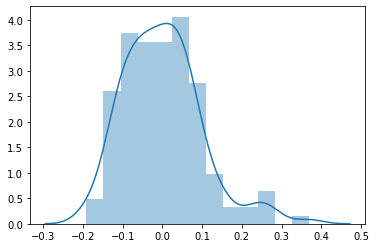

In [153]:
res= ytrain-ytrain_pred
sns.distplot(res)

### Make predictions on the test set

In [155]:
def Normalize_Test(test_,col):
    
    xmin= min(master_car_train[col])
    xmax=max(master_car_train[col])
    test_[col]=test_[col].apply(lambda x: ((x-xmin)/(xmax-xmin)))
    return test_

In [156]:
numvars=['wheelbase','carlength','carwidth','price','carheight','curbweight','enginesize','boreratio','compressionratio','stroke','horsepower','peakrpm','citympg','highwaympg','cylindernumber']
for col in numvars:
    car_test= Normalize_Test(car_test,col)

In [157]:
car_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,car_company_name_0,car_company_name_1,car_company_name_2,car_company_name_3,car_company_name_4,car_company_name_5
160,0,0,1,0,0.313793,0.409756,0.341667,0.460177,0.235066,1,...,0,0,1,0,0,1,0,1,0,0
186,0,0,1,0,0.368966,0.497561,0.433333,0.699115,0.305275,1,...,0,0,0,1,0,1,0,1,0,1
59,0,0,0,0,0.420690,0.596748,0.516667,0.522124,0.347944,1,...,0,0,1,0,0,0,1,0,0,1
165,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.301396,1,...,0,0,0,1,0,1,0,1,0,0
140,0,0,0,0,0.231034,0.263415,0.291667,0.699115,0.291699,1,...,0,0,1,0,0,1,0,0,1,1


In [158]:
master_car_test= car_test.copy()

In [159]:
y_test=car_test.pop('price')
X_test=car_test

In [160]:
Xtest_sm=sm.add_constant(X_test)
Xtest_sm.head()

,const,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,car_company_name_0,car_company_name_1,car_company_name_2,car_company_name_3,car_company_name_4,car_company_name_5
160,1.0,0,0,1,0,0.313793,0.409756,0.341667,0.460177,0.235066,...,0,0,1,0,0,1,0,1,0,0
186,1.0,0,0,1,0,0.368966,0.497561,0.433333,0.699115,0.305275,...,0,0,0,1,0,1,0,1,0,1
59,1.0,0,0,0,0,0.420690,0.596748,0.516667,0.522124,0.347944,...,0,0,1,0,0,0,1,0,0,1
165,1.0,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.301396,...,0,0,0,1,0,1,0,1,0,0
140,1.0,0,0,0,0,0.231034,0.263415,0.291667,0.699115,0.291699,...,0,0,1,0,0,1,0,0,1,1


In [161]:
Xrfe_train_12.columns

Index(['const', 'enginelocation', 'horsepower', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'rwd', 'car_company_name_3'],
      dtype='object')

In [167]:
Xtest_sm.columns.difference(Xrfe_train_12.columns)

Index(['aspiration', 'boreratio', 'car_company_name_0', 'car_company_name_1',
       'car_company_name_2', 'car_company_name_4', 'car_company_name_5',
       'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio',
       'curbweight', 'cylindernumber', 'doornumber', 'enginesize',
       'enginetype', 'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2',
       'fuelsystem_3', 'fueltype', 'fwd', 'highwaympg', 'peakrpm', 'stroke',
       'wheelbase'],
      dtype='object')

In [169]:
columns=['aspiration', 'boreratio', 'car_company_name_0', 'car_company_name_1',
       'car_company_name_2', 'car_company_name_4', 'car_company_name_5',
       'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio',
       'curbweight', 'cylindernumber', 'doornumber', 'enginesize',
       'enginetype', 'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2',
       'fuelsystem_3', 'fueltype', 'fwd', 'highwaympg', 'peakrpm', 'stroke',
       'wheelbase']
Xtest_sm=Xtest_sm.drop(columns,axis=1)

In [170]:
Xtest_sm.head()

,const,enginelocation,horsepower,hardtop,hatchback,sedan,wagon,rwd,car_company_name_3
160,1.0,0,0.091667,0,0,1,0,0,1
186,1.0,0,0.154167,0,0,1,0,0,1
59,1.0,0,0.150000,0,1,0,0,0,0
165,1.0,0,0.266667,0,0,1,0,1,1
140,1.0,0,0.104167,0,1,0,0,0,0


In [190]:
ytest_pred=lm.predict(Xtest_sm)

In [188]:
print('R2 value for train data is '+str(round(r2_score(y_true=ytrain,y_pred=ytrain_pred),4)*100)+'%')

R2 value for train data is 79.14%


In [187]:
print('R2 value for test data is '+ str(round(r2_score(y_true=ytest,y_pred=ytest_pred),4)*100)+'%')

R2 value for test data is 74.58%


Text(0, 0.5, 'y_pred')

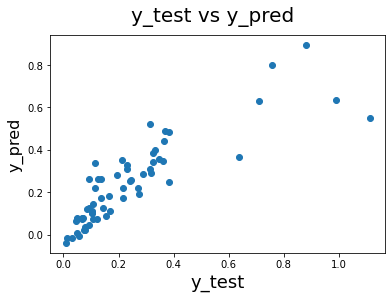

In [189]:
fig = plt.figure()
plt.scatter(ytest,ytest_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 